In [74]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from keras.preprocessing.image import load_img, img_to_array, array_to_img
%matplotlib inline
plt.style.use('ggplot')
# plt.style.use('fivethirtyeight')



/Users/mbun/Code/dsi_galvanize/capstones/capstone_3/Dog-Years-Age-Classification/src


In [102]:
expert_ds_loc = '../../data/Expert_TrainEval'
petfinder_ds_loc = '../../data/PetFinder_All'

expert_senior_imgs = [fn for fn in os.listdir(f'{expert_ds_loc}/Senior') if fn.endswith('.jpg') or fn.endswith('.png')]
expert_adult_imgs = [fn for fn in os.listdir(f'{expert_ds_loc}/Adult') if fn.endswith('.jpg') or fn.endswith('.png')]
expert_young_imgs = [fn for fn in os.listdir(f'{expert_ds_loc}/Young') if fn.endswith('.jpg') or fn.endswith('.png')]

petfinder_senior_imgs = [fn for fn in os.listdir(f'{petfinder_ds_loc}/Senior') if fn.endswith('.jpg') or fn.endswith('.png')]
petfinder_adult_imgs = [fn for fn in os.listdir(f'{petfinder_ds_loc}/Adult') if fn.endswith('.jpg') or fn.endswith('.png')]
petfinder_young_imgs = [fn for fn in os.listdir(f'{petfinder_ds_loc}/Young') if fn.endswith('.jpg') or fn.endswith('.png')]

all_imgs = [expert_senior_imgs, expert_adult_imgs, expert_young_imgs, petfinder_senior_imgs, petfinder_adult_imgs, petfinder_young_imgs]

# [fn if fn.endswith('.jpg') or fn.endswith('.png') else print(fn) for fn in os.listdir(f'{petfinder_ds_loc}/Young')];


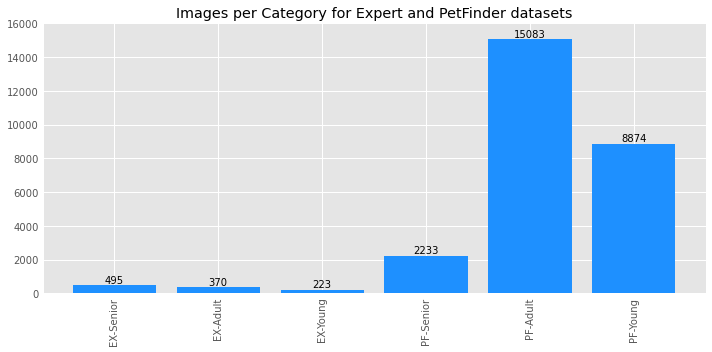

In [103]:
labels = ['EX-Senior', 'EX-Adult', 'EX-Young', 'PF-Senior', 'PF-Adult', 'PF-Young']
totals = [len(x) for x in all_imgs]

plt.figure(figsize=(10,5))
plt.bar(labels, totals , color='dodgerblue')

for i, y in enumerate(totals):
    plt.text(i, y, y, ha='center', va='bottom')#, fontsize=14, fontweight='bold')

plt.title('Images per Category for Expert and PetFinder datasets')#, fontsize=20, fontweight='bold')
plt.ylim(0, 16000)
plt.xticks(rotation=90)#, fontsize=14, fontweight='bold')
# plt.yticks(fontsize=14, fontweight='bold')
plt.tight_layout()


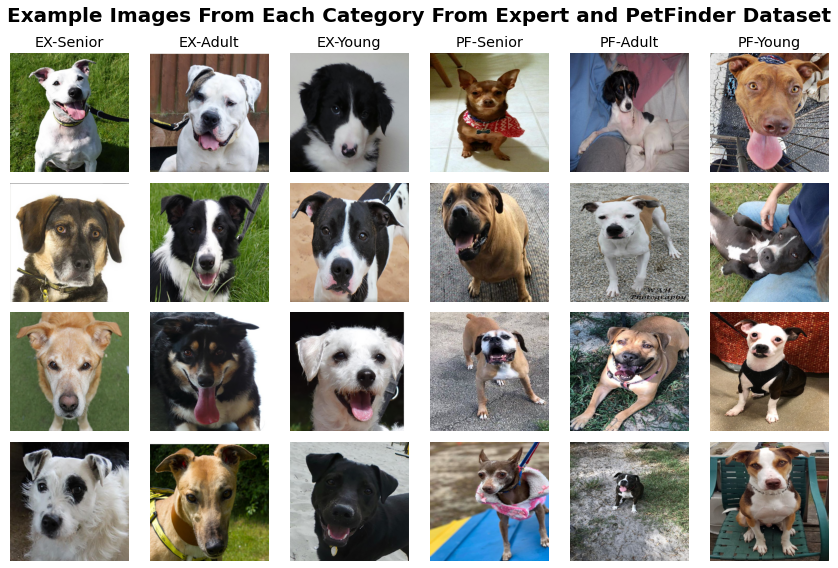

In [211]:
fig, ax = plt.subplots(4, 6, figsize=(12,8))
for i1, imgset in enumerate(all_imgs):
    lbl = labels[i1]
    lbl_ds, lbl_cat = lbl.split('-')
    # print(lbl_ds, lbl_cat)
    if lbl_ds == 'EX':
        fp = f'{expert_ds_loc}/{lbl_cat}/'
    else:
        fp = f'{petfinder_ds_loc}/{lbl_cat}/'
    select_4 = np.random.choice(imgset, 4, replace=False)
    ax[0][i1].set_title(lbl)
    for i2, img_select in enumerate(select_4):
        fp_img = fp + img_select
        # print(fp_img)
        fn = image.load_img(fp_img, target_size=(500,500))
        ax[i2][i1].imshow(fn)
        ax[i2][i1].axis('off')
fig.suptitle('Example Images From Each Category From Expert and PetFinder Dataset', fontsize=20, fontweight='bold')
fig.tight_layout()

In [213]:
from keras.preprocessing.image import load_img, img_to_array, array_to_img
from numba import jit

In [221]:
def img_array_stack(full_mat, img_np):
    img_np_1d = img_np.ravel()
    return np.vstack((full_mat, img_np_1d))

In [222]:
def img2np(path, list_of_filenames, size=(500, 500)):
    for i, fn in enumerate(list_of_filenames):
        fp = path + fn
        current_img = load_img(fp, target_size=size)
        img_np = img_to_array(current_img)
        try:
            full_mat = img_array_stack(full_mat, img_np)
        except UnboundLocalError: 
            full_mat = img_np.ravel()
            # break
        if i % 25 == 0:
            print(round(i/len(list_of_filenames)*100,1)," percent complete         \r",)
            # print()

    # print("")
    return full_mat

In [223]:
img2np(f'{expert_ds_loc}/Senior/', expert_senior_imgs, (224,224))

0.0  percent complete         
5.1  percent complete         
10.1  percent complete         
15.2  percent complete         
20.2  percent complete         
25.3  percent complete         
30.3  percent complete         
35.4  percent complete         
40.4  percent complete         
45.5  percent complete         
50.5  percent complete         
55.6  percent complete         
60.6  percent complete         
65.7  percent complete         
70.7  percent complete         
75.8  percent complete         
80.8  percent complete         
85.9  percent complete         
90.9  percent complete         
96.0  percent complete         



array([[255., 254., 255., ...,  57.,  85.,  36.],
       [ 53.,  62.,  31., ...,  60.,  74.,  41.],
       [  0.,   0.,   0., ..., 103.,  85.,  63.],
       ...,
       [253., 235., 199., ..., 193., 150.,  11.],
       [254., 254., 254., ...,  11.,   9.,  14.],
       [254., 255., 253., ..., 189., 171., 147.]], dtype=float32)

In [193]:
_ = load_img(fp_img, target_size=(500, 500))
img_to_array(_).ravel() * 1./255
# _.format, _.size, _.mode
# np.asarray(_)
def img2np(path, list_of_filenames, size=(500, 500)):
    for i, fn in enumerate(list_of_filenames):
        fp = path + fn
        current_img = load_img(fp, target_size=size)
        img_np_1d = img_to_array(current_img).ravel()
        try:
            full_mat = np.vstack((full_mat, img_np_1d))
        except UnboundLocalError: 
            full_mat = img_np_1d
            # break
        if i % 25 == 0:
            print(round(i/len(list_of_filenames)*100,1)," percent complete         \r",)
            # print()

    print("")
    return full_mat
x = img2np(f'{expert_ds_loc}/Senior/', expert_senior_imgs)
x

0.0  percent complete         
5.1  percent complete         
10.1  percent complete         
15.2  percent complete         
20.2  percent complete         
25.3  percent complete         
30.3  percent complete         
35.4  percent complete         
40.4  percent complete         
45.5  percent complete         
50.5  percent complete         
55.6  percent complete         
60.6  percent complete         
65.7  percent complete         
70.7  percent complete         
75.8  percent complete         
80.8  percent complete         
85.9  percent complete         
90.9  percent complete         
96.0  percent complete         



array([[255., 255., 250., ...,  97., 119.,  72.],
       [ 89.,  97.,  60., ...,  61.,  75.,  50.],
       [ 34.,  34.,  32., ..., 126., 109.,  89.],
       ...,
       [253., 237., 203., ..., 208., 163.,  48.],
       [255., 255., 255., ...,  45.,  43.,  48.],
       [255., 255., 255., ..., 201., 183., 161.]], dtype=float32)

In [195]:
x.shape

(495, 750000)

In [121]:
# making n X m matrix
def img2np(path, list_of_filename, size = (64, 64)):
    # iterating through each file
    for fn in list_of_filename:
        fp = path + fn
        current_image = image.load_img(fp, target_size = size, 
                                       color_mode = 'grayscale')
        # covert image to a matrix
        img_ts = image.img_to_array(current_image)
        # turn that into a vector / 1D array
        img_ts = [img_ts.ravel()]
        try:
            # concatenate different images
            full_mat = np.concatenate((full_mat, img_ts))
        except UnboundLocalError: 
            # if not assigned yet, assign one
            full_mat = img_ts
    return full_mat

# run it on our folders
normal_images = img2np(f'{train_dir}/NORMAL/', normal_imgs)
pnemonia_images = img2np(f'{train_dir}/PNEUMONIA/', pneumo_imgs)

NameError: name 'normal_imgs' is not defined

In [228]:
def get_file_paths(path):
    '''
    Takes a folder path and returns a set of all file paths of .jpg in the folders
    Input: Folder path
    '''
    file_set = set()

    for direct, _, files in os.walk(path):
        for file_name in files:
            rel_dir = os.path.relpath(direct, path)
            rel_file = os.path.join(rel_dir, file_name)
            if '.jpg' not in rel_file:
                continue
            file_set.add(str(path)+rel_file)

    return file_set
for x, y, z in os.walk('../../data/Expert_TrainEval'):
    print(x)

../../data/Expert_TrainEval
../../data/Expert_TrainEval/Senior
../../data/Expert_TrainEval/Young
../../data/Expert_TrainEval/Adult


In [229]:
os.walk('../../data/Expert_TrainEval')[0]

TypeError: 'generator' object is not subscriptable

In [329]:
path = '../../data/Expert_TrainEval'
# path = '../../data/PetFinder_All'
outpath = '../data/'
img_size=(500, 500)

def img2np_save(path, outpath, img_size):
    ds_name = path.split('/')[-1].split('_')[0].lower()


    filepaths = [x for x, y, z in os.walk(path)]
    categories = [y for x, y, z in os.walk(path)][0]
    img_lists = [z for x, y, z in os.walk(path)]
    # walk = [x for x in zip(filepaths[1:], categories, img_lists[1:])]
    for fp, cat, img_lst in zip(filepaths[1:], categories, img_lists[1:]):
        # print(fp, cat, len(img_lst), img_lst[0])
        full_mat = img2np(fp, img_lst, img_size)
        save_path = f"{outpath}{ds_name}_{cat.lower()}_{img_size[0]}.npy"
        np.save(save_path, full_mat)
        print(ds_name, cat.lower(), 'done')

        

        # print(save_path)
# save_path
img2np_save(path, outpath, img_size)

expert senior done
expert young done
expert adult done
